In [9]:
import json

import awkward as ak
from rich import print

from python.analysis import Master, EventSelection, BeamParticleSelection, PFOSelection, Plots, Tags, shower_merging

shower_merging.SetPlotStyle()

In [4]:
events = Master.Data("work/ROOTFiles/PDSPAnalyser/PDSPProd4a_MC_2GeV_reco1_sce_datadriven_v1_ntuple_v09_41_00_03.root", nTuple_type = Master.Ntuple_Type.PDSP)
with open("work/2023/PDSPProd4a_MC_2GeV_reco1_sce_datadriven_v1_ntuple_v09_41_00_03/PDSPProd4a_MC_2GeV_reco1_sce_datadriven_v1_ntuple_v09_41_00_03_fit_values.json") as f:
    fits = json.load(f)

In [5]:
mask = BeamParticleSelection.CreateDefaultSelection(events, False, fits, return_table = False)
events.Filter([mask], [mask])
mask = PFOSelection.GoodShowerSelection(events)
events.Filter([mask])

# Generate truth regions
# truth_pi0_counts = EventSelection.count_diphoton_decays(events)
# truth_pi_plus_counts = EventSelection.count_non_beam_charged_pi(events)s
truth_regions = EventSelection.create_regions(events.trueParticles.nPi0, events.trueParticles.nPiPlus)

# Generate reco regions
reco_pi0_counts = EventSelection.count_pi0_candidates(events, exactly_two_photons = True)
reco_pi_plus_counts_mom_cut = EventSelection.count_charged_pi_candidates(events,energy_cut = None)
reco_regions_mom_cut = EventSelection.create_regions(reco_pi0_counts, reco_pi_plus_counts_mom_cut)

number of entries before|after PiBeamSelection: 141548|102443
number of entries before|after PandoraTagCut: 141548|123438
number of entries before|after CaloSizeCut: 141548|125589


/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered in divide
  result = getattr(ufunc, method)(
/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


number of entries before|after MichelScoreCut: 141548|115682
number of entries before|after BeamQualityCut: 141548|83328
number of entries before|after APA3Cut: 141548|121291
number of entries before|after MedianDEdXCut: 141548|131247
                 number of events which pass the cut  single efficiency  \
no selection                                141548.0         100.000000   
PiBeamSelection                             102443.0          72.373329   
PandoraTagCut                               123438.0          87.205754   
CaloSizeCut                                 125589.0          88.725379   
MichelScoreCut                              115682.0          81.726340   
BeamQualityCut                               83328.0          58.869076   
APA3Cut                                     121291.0          85.688954   
MedianDEdXCut                               131247.0          92.722610   

                 number of events after successive cuts  \
no selection                  

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to nTuple_type.
  warnings.warn(f"Couldn't apply filters to {var}.")


number of entries before|after ValidRecoPositionCut: 174945|167606
number of entries before|after ValidRecoMomentumCut: 174945|155758
number of entries before|after ValidRecoEnergyCut: 174945|155758


/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_pandora_tag.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_caloWire.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_nHits.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_michelScore.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_startPos.
  warnings.warn(f"Couldn't apply filters

number of entries before|after EMScoreCut: 155758|55575
number of entries before|after NHitsCut: 155758|100409
number of entries before|after BeamParticleDistanceCut: 155758|138880
number of entries before|after BeamParticleIPCut: 155758|104613
number of entries before|after VetoBeamParticle: 155758|155758
number of entries before|after TrackScoreCut: 155758|100024
number of entries before|after NHitsCut: 155758|144811
number of entries before|after PiPlusSelection: 155758|83850


In [8]:
print(truth_regions)
print(reco_regions_mom_cut)

total = ak.sum(reco_regions_mom_cut["charge_exchange"])
cex_purity = {r : ak.sum(reco_regions_mom_cut["charge_exchange"] & truth_regions[r]) / total for r in truth_regions}
print(cex_purity)

{
    'absorption': <Array [False, False, False, ... False, False] type='46314 * bool'>,
    'charge_exchange': <Array [False, False, True, ... False, False] type='46314 * bool'>,
    'pion_prod_0_pi0': <Array [False, True, False, ... False, True] type='46314 * bool'>,
    'pion_prod_1_pi0': <Array [True, False, False, ... True, False] type='46314 * bool'>,
    'pion_prod_>1_pi0': <Array [False, False, False, ... False, False] type='46314 * bool'>
}

{
    'absorption': <Array [True, False, True, ... False, False] type='46314 * bool'>,
    'charge_exchange': <Array [False, False, False, ... False, False] type='46314 * bool'>,
    'pion_prod_0_pi0': <Array [False, True, False, ... True, True] type='46314 * bool'>,
    'pion_prod_1_pi0': <Array [False, False, False, ... False, False] type='46314 * bool'>,
    'pion_prod_>1_pi0': <Array [False, False, False, ... False, False] type='46314 * bool'>
}

{
    'absorption': 0.017857142857142856,
    'charge_exchange': 0.32261904761904764,
    'pion_prod_0_pi0': 0.16547619047619047,
    'pion_prod_1_pi0': 0.23333333333333334,
    'pion_prod_>1_pi0': 0.26071428571428573
}

In [10]:
reco_cex_events = events.Filter([reco_regions_mom_cut["charge_exchange"]], [reco_regions_mom_cut["charge_exchange"]], returnCopy = True)
photon_candidates = PFOSelection.InitialPi0PhotonSelection(reco_cex_events)
shower_pairs = Master.ShowerPairs(reco_cex_events, shower_pair_mask = photon_candidates)

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:165: UserWarning: nTuple type is not specified, assuming it is shower_merging
  warnings.warn(f"nTuple type is not specified, assuming it is {Ntuple_Type.SHOWER_MERGING}")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to nTuple_type.
  warnings.warn(f"Couldn't apply filters to {var}.")


number of entries before|after EMScoreCut: 3388|2437
number of entries before|after NHitsCut: 3388|2400
number of entries before|after BeamParticleDistanceCut: 3388|3287
number of entries before|after BeamParticleIPCut: 3388|2845
number of entries before|after VetoBeamParticle: 3388|3388


In [11]:
tags = EventSelection.GenerateTrueFinalStateTags(reco_cex_events)

for tag in tags:
    print(tag, ak.sum(tags[tag].mask)/ak.count(tags[tag].mask))

df = shower_pairs.CalculateAll()

$1\pi^{0} + 0\pi^{+}$ 0.32261904761904764

$0\pi^{0} + 0\pi^{+}$ 0.017857142857142856

$1\pi^{0} + \geq 1\pi^{+}$ 0.23333333333333334

$0\pi^{0} + \geq 1\pi^{+}$ 0.16547619047619047

$\greater 1\pi^{0} + \geq 0\pi^{+}$ 0.26071428571428573

reco_lead_energy

reco_sub_energy

reco_lead_nHits

reco_sub_nHits

reco_lead_nHits_collection

reco_sub_nHits_collection

reco_lead_purity

reco_sub_purity

reco_lead_completeness

reco_sub_completeness

reco_lead_purity_collection

couldn't calculate reco_lead_purity_collection

reco_sub_purity_collection

couldn't calculate reco_sub_purity_collection

reco_lead_completeness_collection

couldn't calculate reco_lead_completeness_collection

reco_sub_completeness_collection

couldn't calculate reco_sub_completeness_collection

reco_angle

reco_mass

reco_energy

reco_pi0_mom

reco_pi0_mom_mag

reco_direction

reco_closest_approach

reco_separation

reco_beam_slice

couldn't calculate reco_beam_slice

true_lead_energy

true_sub_energy

true_angle

/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(


true_mass

true_energy

true_pi0_mom

true_pi0_mom_mag

true_direction

true_closest_approach

/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


true_separation

cheated_lead_energy

couldn't calculate cheated_lead_energy

cheated_sub_energy

couldn't calculate cheated_sub_energy

cheated_angle

cheated_mass

couldn't calculate cheated_mass

cheated_energy

cheated_pi0_mom

couldn't calculate cheated_pi0_mom

cheated_pi0_mom_mag

couldn't calculate cheated_pi0_mom_mag

cheated_direction

couldn't calculate cheated_direction

cheated_closest_approach

cheated_separation

error_lead_energy

error_sub_energy

error_angle

/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered in divide
  result = getattr(ufunc, method)(


error_mass

error_pi0_mom

error_pi0_mom_mag

error_closest_approach

error_separation

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:2385: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([pd.DataFrame(metadata), df], 1)


event       run  subrun  reco_lead_energy  reco_sub_energy  \
0     1636  20917189      24        585.748115       154.759058   
1     1824  44833767       2        545.461318       299.542297   
2     1631  20918728      28        171.094595       104.020154   
3      740  45667673      60        191.949689        52.580958   
4     2054  44957228       8        855.171999        90.620578   
..     ...       ...     ...               ...              ...   
835    159  20913285       4        863.025826        74.955247   
836   1049  45668610      62        196.660364       169.966317   
837    173  20915139       9        465.581988       296.285390   
838   1423  20935235      64        324.796052       157.329359   
839    161  45707978      79        197.590788       108.848126   

     reco_lead_nHits  reco_sub_nHits  reco_lead_nHits_collection  \
0                910             180                         910   
1                928             505                         928   
2                169             119                         169   
3                190              99                         190   
4               1099             105                        1099   
..               ...             ...                         ...   
835             1139             134                        1139   
836              208             270                         208   
837              711             547                         711   
838              548             364                         548   
839              323             113                         323   

     reco_sub_nHits_collection  reco_lead_purity  ...  error_lead_energy  \
0                          180          0.747655  ...          -0.092090   
1                          505          0.344006  ...           0.179781   
2                          119          0.824742  ...          -0.082718   
3                           99          0.697211  ...          -0.083382   
4                          105          0.814152  ...          -0.099154   
..                         ...               ...  ...                ...   
835                        134          0.821296  ...          -0.196758   
836                        270          0.840164  ...          -0.392323   
837                        547          0.831106  ...          -0.323222   
838                        364          0.766929  ...          -0.311657   
839                        113          0.939577  ...          -0.201181   

     error_sub_energy  error_angle  error_mass  error_pi0_mom_x  \
0           -0.643546    -0.039639   -0.452965       717.835197   
1            0.171178    -0.327390   -0.202836      6739.029346   
2           -0.070484     0.103487    0.010086      4289.421981   
3           -0.304730    -0.216791   -0.361484       713.167725   
4           -0.839068     0.150303   -0.563371       911.797978   
..                ...          ...         ...              ...   
835         -0.194565     0.243302   -0.004182      2182.158890   
836         -0.154605    -0.237646   -0.450832       420.741066   
837         -0.015328     0.201225   -0.021003      1712.444602   
838         -0.143289     0.476193    0.121682      1578.152312   
839          0.693177     0.348319    0.525195      1188.436272   

     error_pi0_mom_y  error_pi0_mom_z  error_pi0_mom_mag  \
0        2107.805558      1160.025814        1161.999910   
1        2387.951279      1517.242582        1582.735209   
2        1112.236018       423.159111        1284.639789   
3       -5169.239539      1520.577856        1528.156126   
4        1230.205770      1282.056223        1174.214066   
..               ...              ...                ...   
835      1778.221002      1299.736614        1487.409653   
836       901.585153       756.448217         774.754541   
837      1118.445407       928.311400         949.574127   
838       921.517186       720.516282        1011.696754   
839  

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Plots.py:890: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  if newFigure is True: plt.figure()


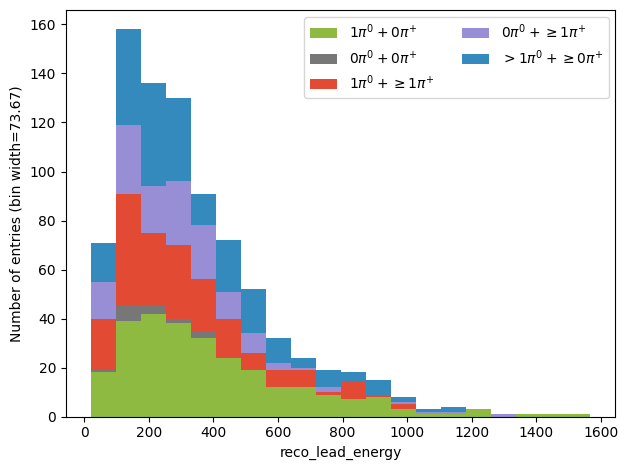

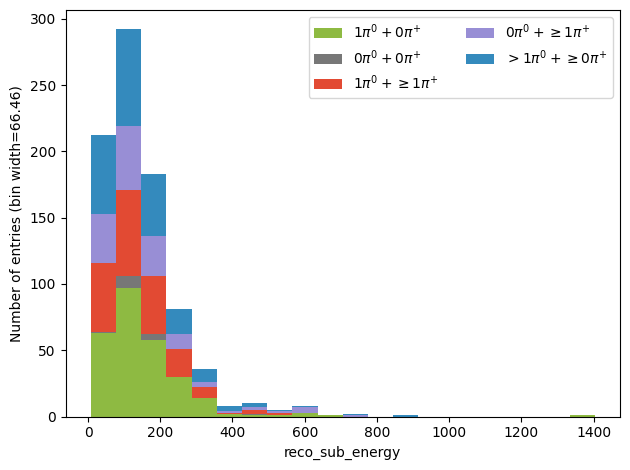

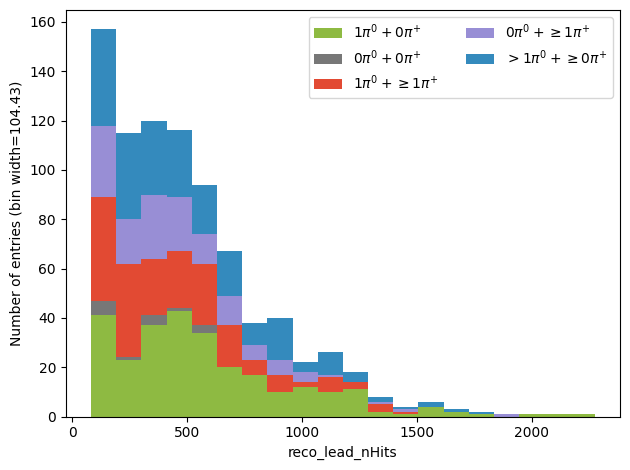

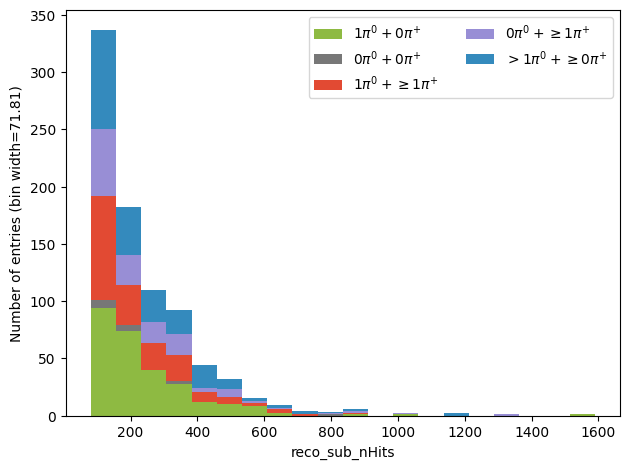

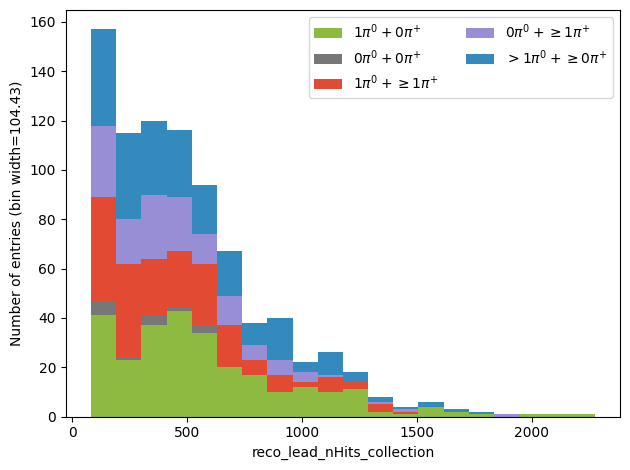

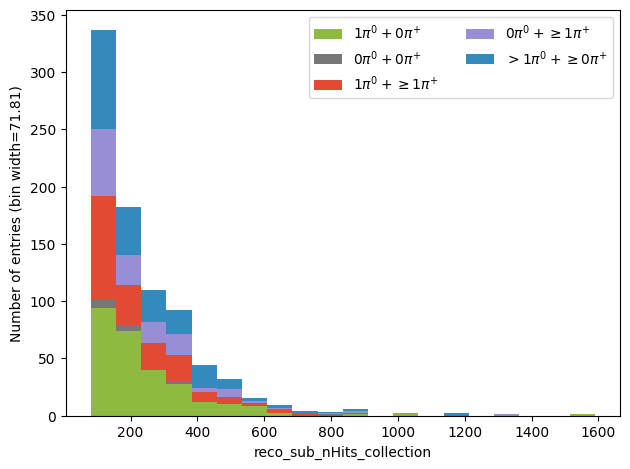

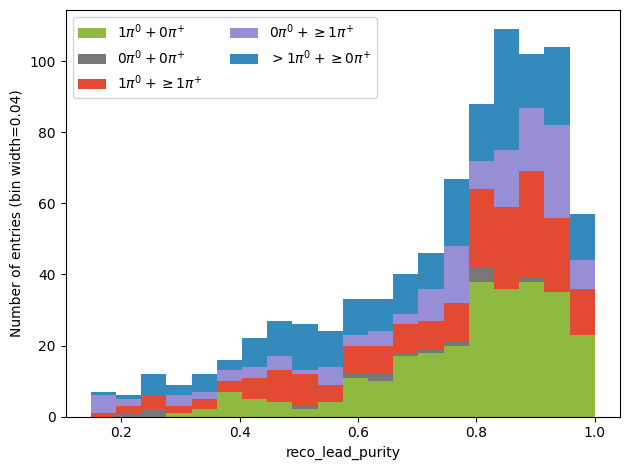

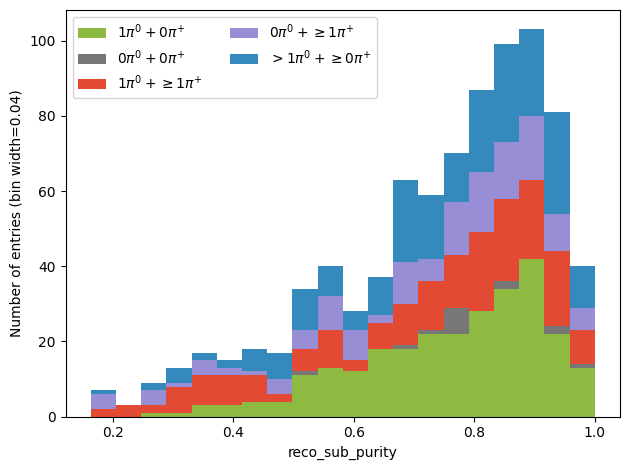

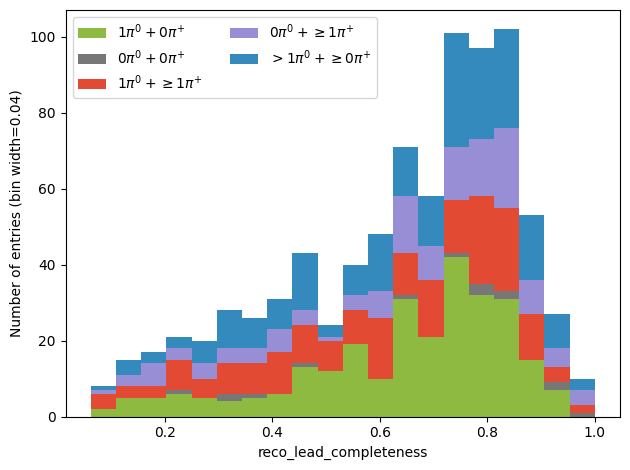

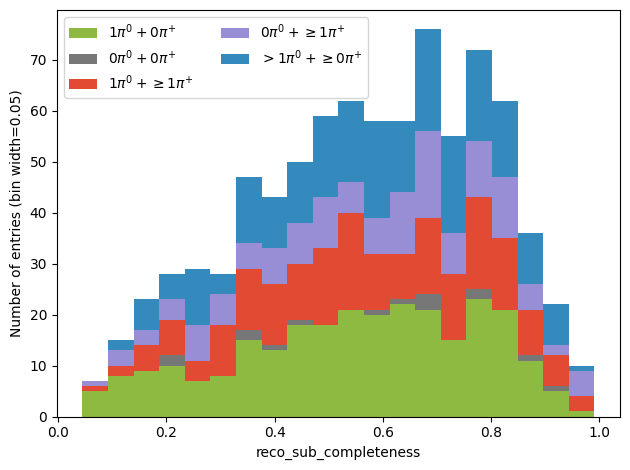

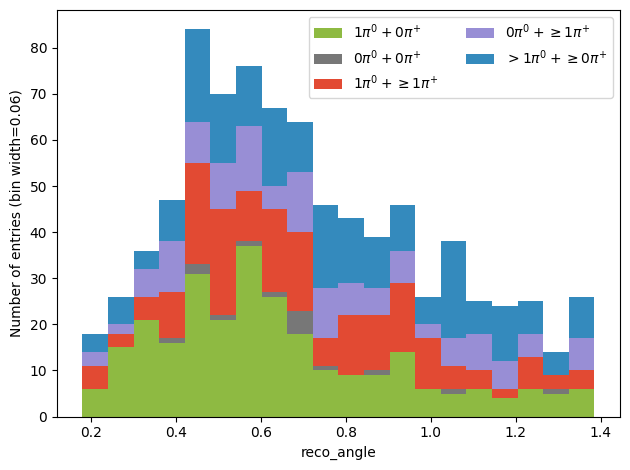

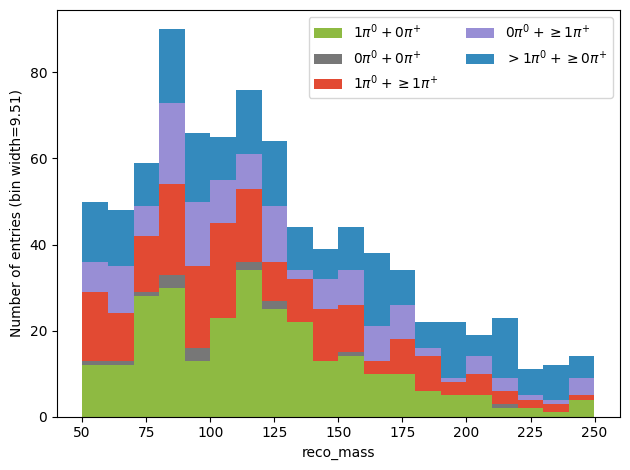

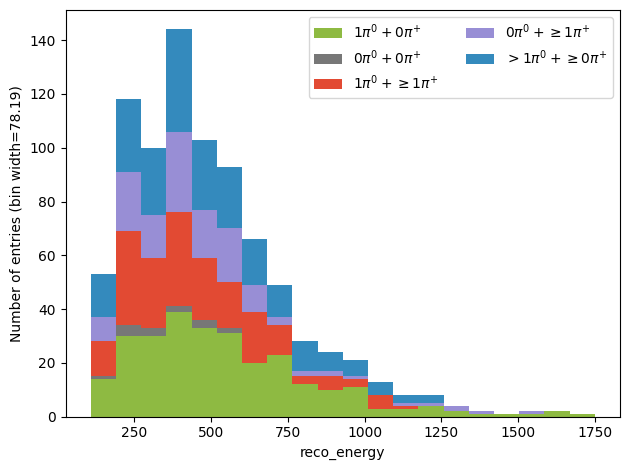

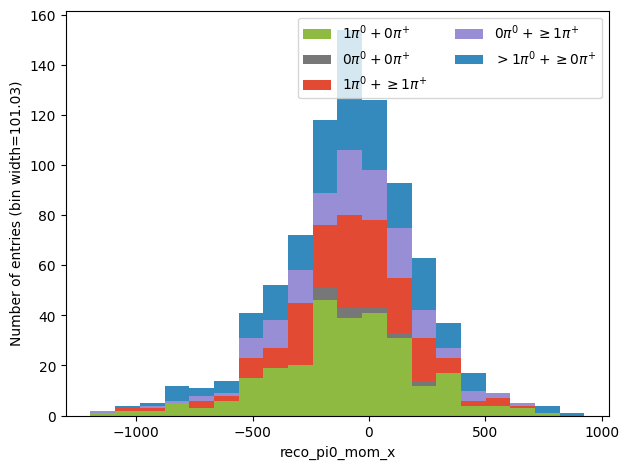

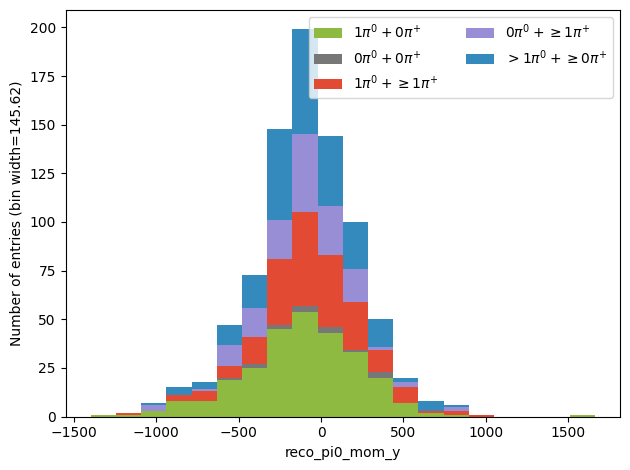

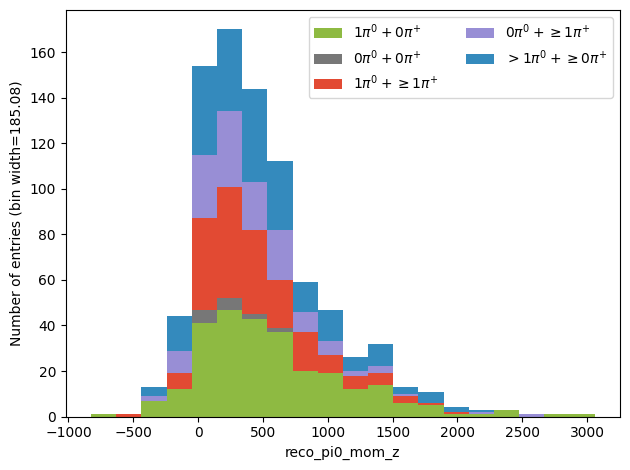

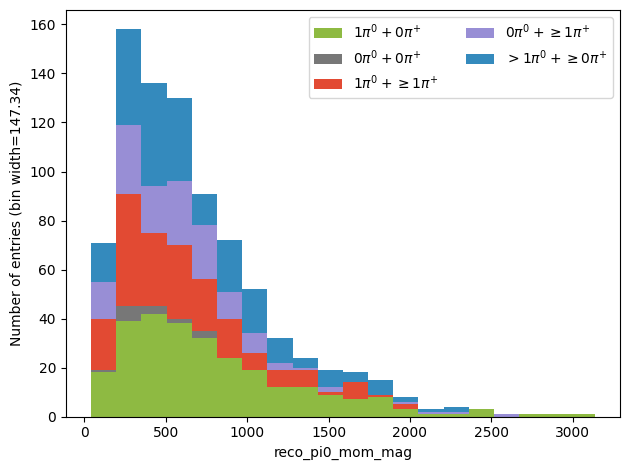

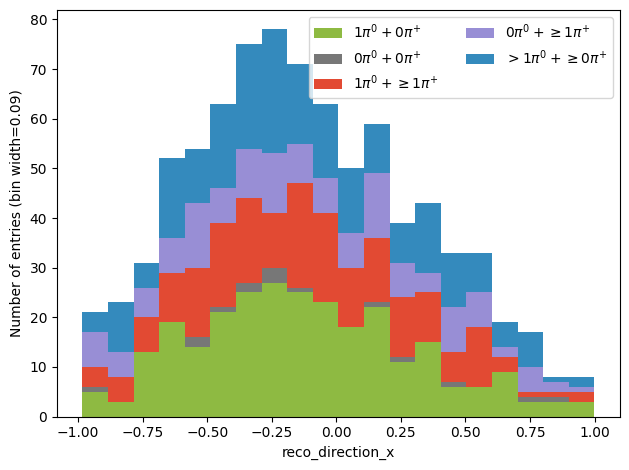

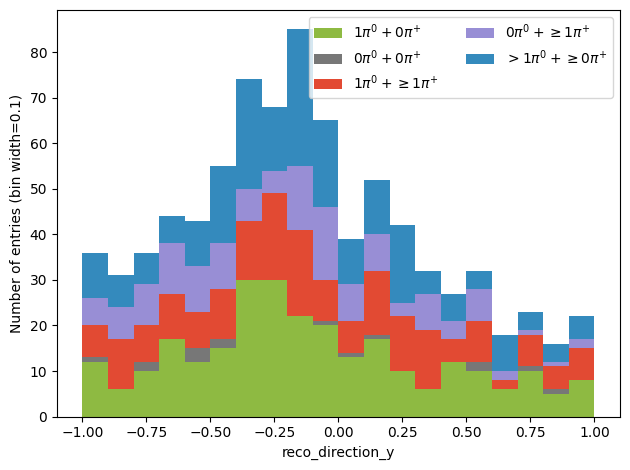

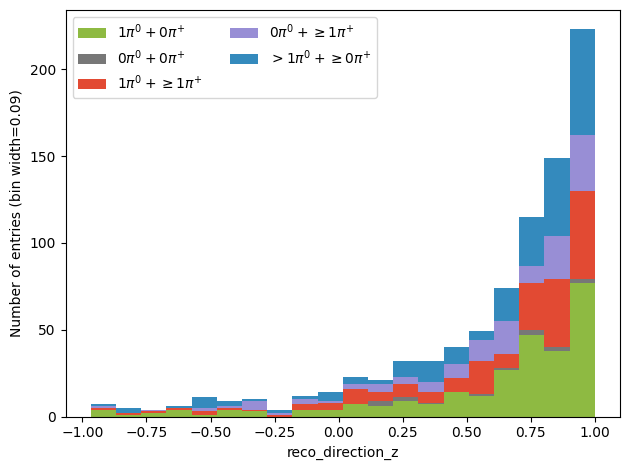

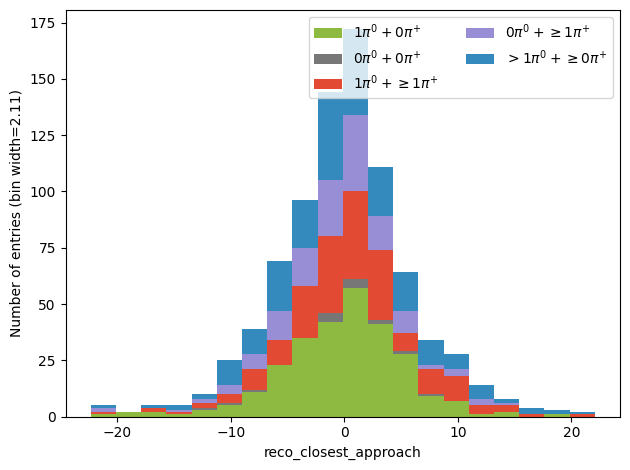

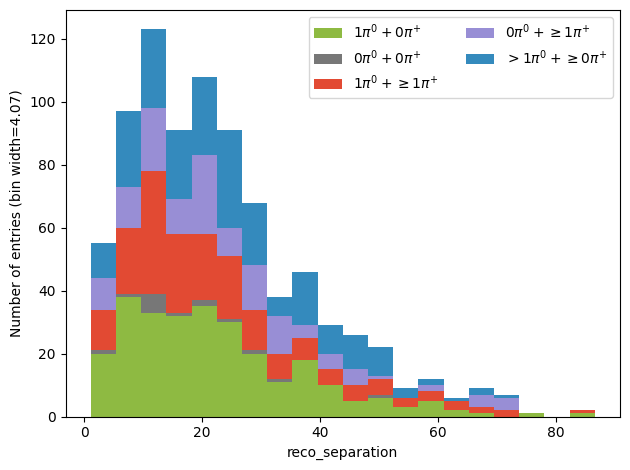

In [12]:
quantities = df.filter(regex="reco")
for q in quantities:
    Plots.PlotTagged(df[q], tags, x_label = q, bins = 20)

In [ ]:
region = reco_regions_mom_cut["charge_exchange"] & truth_regions["pion_prod_0_pi0"]
e = 5
# print("truth")
# print(f"{events.trueParticles.pdg[region][e]}")
# print("backtracked truth")
# print(f"{events.trueParticlesBT.pdg[region][e]}")
# print(f"{events.trueParticlesBT.mother[region][e]}")

# print("reco")
# print(f"{events.recoParticles.trackScore[region][e]=}")
# print(f"{events.recoParticles.emScore[region][e]=}")
# print(f"{events.recoParticles.n_hits[region][e]=}")
# print(f"{PFOSelection.Median(events.recoParticles.track_dEdX[region][e])=}")

""" failuure modes
    no PFOs are backtracked to the daughter pi+
    pi+ fails track cut
    pi+ fails n_hits cut
    pi+ fails michel score cut
    pi+ mid id'd as photon
"""
print("number of events in region", ak.sum(region))
pip_backtracked = ak.sum(events.trueParticlesBT.pdg[region] == 211, -1)
print("number of events without a backtracked pi+", ak.sum(pip_backtracked == 0))

pi0_photons = ak.sum(events.trueParticlesBT.motherPdg[region] == 111, -1)
print("number of events wihout a backtracked pi0 photon", ak.sum(pi0_photons == 0))